### Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data
https://www.kaggle.com/competitions/home-data-for-ml-course/

---
##### Data Dictionary

    Data dictionary available in file ../../DATA/kaggle/home-data-for-ml-course/data_description.txt
---

In [2]:
df_train = pd.read_csv("../../DATA/kaggle/home-data-for-ml-course/train.csv")
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Goal definition
**Predict the sales price for each house. For each Id in the test set, you must predict the value of the SalePrice variable.**\
\
The problem refers to regression, that is, to predict the numerical value of a house.

## Exploratory Data Analysis and Visualisations

#### Basic Exploration

In [3]:
df_train.shape

(1460, 81)

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

#### Duplicates

In [5]:
df_train.duplicated().sum()

np.int64(0)

##### Feature engineering - ID column unneccesary

In [6]:
df_train = df_train.drop('Id', axis=1)

#### Missing values

In [7]:
df_train.isnull().sum()[df_train.isnull().sum() > 0].sort_values()

Electrical         1
MasVnrArea         8
BsmtCond          37
BsmtFinType1      37
BsmtQual          37
BsmtExposure      38
BsmtFinType2      38
GarageType        81
GarageQual        81
GarageFinish      81
GarageCond        81
GarageYrBlt       81
LotFrontage      259
FireplaceQu      690
MasVnrType       872
Fence           1179
Alley           1369
MiscFeature     1406
PoolQC          1453
dtype: int64

##### Feature engineering - missing values

In [8]:
def percent_missing(df):
    percent_nan = 100 * df_train.isnull().sum() / len(df)
    percent_nan = percent_nan[percent_nan > 0].sort_values()
    return percent_nan

def show_missing(percent_nan):
    plt.figure(figsize=(5,4))
    sns.barplot(x=percent_nan.index, y=percent_nan, hue=percent_nan.index, palette='hls')
    plt.xticks(rotation=90)
    plt.xlabel('Missing values column name')
    plt.ylabel('% of missing values')
    plt.show()

In [9]:
percent_nan = percent_missing(df_train)

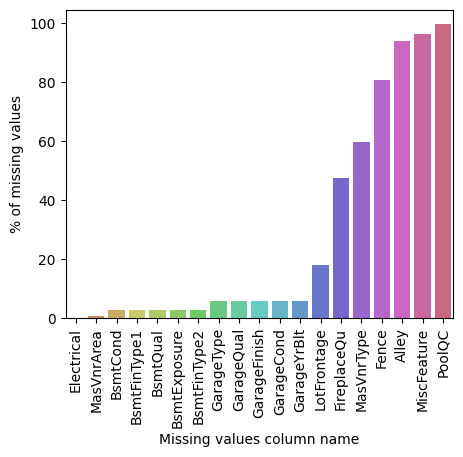

In [10]:
show_missing(percent_nan)

In [11]:
# Finding correlation between missing values and sale price tosee if they are important
df_missing_vals = df_train[percent_nan.index]
df_missing_vals = pd.get_dummies(df_missing_vals, drop_first=True)
correlation = df_missing_vals.corrwith(df_train['SalePrice']).sort_values()
correlation

BsmtQual_TA          -0.452394
GarageFinish_Unf     -0.410608
GarageType_Detchd    -0.354141
BsmtExposure_No      -0.263600
Fence_MnPrv          -0.140613
BsmtFinType1_Rec     -0.135667
GarageQual_Fa        -0.133142
BsmtFinType1_BLQ     -0.132914
GarageCond_Fa        -0.130774
BsmtQual_Fa          -0.128725
Electrical_FuseF     -0.126601
Fence_GdWo           -0.100047
BsmtFinType1_LwQ     -0.084577
BsmtFinType1_Unf     -0.083399
FireplaceQu_Po       -0.075916
GarageType_CarPort   -0.070371
MiscFeature_Shed     -0.069771
GarageCond_Po        -0.063296
BsmtFinType2_BLQ     -0.057102
BsmtCond_Po          -0.054529
Fence_MnWw           -0.051164
Electrical_FuseP     -0.047761
GarageQual_Po        -0.046142
MiscFeature_Othr     -0.040538
BsmtFinType2_Rec     -0.039494
BsmtFinType2_LwQ     -0.037604
Electrical_Mix       -0.037555
GarageType_Basment   -0.029425
Alley_Pave           -0.027655
FireplaceQu_Fa       -0.026086
GarageCond_Gd        -0.000983
BsmtFinType2_GLQ      0.000076
PoolQC_G

**Conclusions:**

    Electrical         1 
        - string values, unknown cause of nan value
        - correlation worth noting and only one value is missing
        - Assumption: Since only one value is missing, you can delete the line
    MasVnrArea         8 
        - numerical value
        - correlation worth noting and only few values are missing
        - Assumption: 0 values recognized by the program as missing - change NA->0
    BsmtCond          37 
        - string values, NA for no basement
        - no such strong correlation with sale price, but only few values are missing
        - Assumption: NA values recognized by the program as missing - change NA->None
    BsmtFinType1      37 
        - string values, NA for no basement
        - correlation worth noting and only few values are missing
        - Assumption: NA values recognized by the program as missing - change NA->None
    BsmtQual          37 
        - string values, NA for no basement
        - correlation worth noting and only few values are missing
        - Assumption: NA values recognized by the program as missing - change NA->None
    BsmtExposure      38 
        - string values, NA for no basement
        - correlation worth noting and only few values are missing
        - Assumption: NA values recognized by the program as missing - change NA->None
    BsmtFinType2      38 
        - string values, NA for no basement
        - no such strong correlation with sale price, but only few values are missing
        - Assumption: NA values recognized by the program as missing - change NA->None
    GarageType        81 
        - string values, NA for no garage
        - correlation worth noting and only few values are missing
        - Assumption: NA values recognized by the program as missing - change NA->None
    GarageQual        81 
        - string values, NA for no garage
        - correlation worth noting and only few values are missing
        - Assumption: NA values recognized by the program as missing - change NA->None
    GarageFinish      81 
        - string values, NA for no garage
        - correlation worth noting and only few values are missing
        - Assumption: NA values recognized by the program as missing - change NA->None
    GarageCond        81 
        - string values, NA for no garage
        - correlation worth noting and only few values are missing
        - Assumption: NA values recognized by the program as missing - change NA->None
    GarageYrBlt       81 
        - numerical value
        - correlation worth noting and only few values are missing
        - Assumption: 0 values recognized by the program as missing - change NA->0
    LotFrontage      259 
        - numerical value
        - correlation worth noting and less than half the value as none
        - Assumption: 0 values recognized by the program as missing - change NA->0
    FireplaceQu      690 
        - string values, NA for no fire place
        - correlation worth noting and less than half the value as none
        - Assumption: NA values recognized by the program as missing - change NA->None
    MasVnrType       872 
        - string values, None for no masonry veneer type
        - correlation worth noting and ~ half of the values are none
        - Assumption: none values recognized by the program as missing - change NA->None
    Fence           1179 
        - string values, NA for no fence
        - no such strong correlation with sale price
        - Assumption: most houses do not have fences, could be removed
    Alley           1369 
        - string values, NA for no alley access
        - no strong correlation with sale price
        - Assumption: most houses do not have alleys, could be removed
    MiscFeature     1406
        - string values, NA for no miscellaneous feature not covered in other categories 
        - no strong correlation with sale price
        - Assumption: most houses do not have misc features, could be removed
    PoolQC          1453 
        - string value, NA for no pool 
        - no strong correlation with sale price
        - Assumption: most houses do not have pools, could be removed

In [12]:
# Dropping unnecessary columns
unnecessary_columns = ['PoolQC','MiscFeature','Alley','Fence']
df_train = df_train.drop(unnecessary_columns, axis=1)

In [13]:
# Dropping unnecessary rows
unnecessary_rows = ['Electrical']
df_train = df_train.dropna(subset=unnecessary_rows, axis=0)

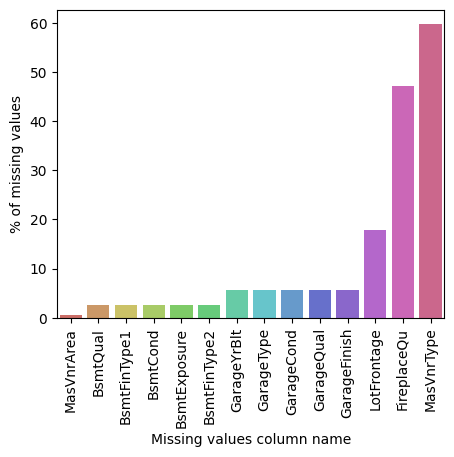

In [14]:
percent_nan = percent_missing(df_train)
show_missing(percent_nan)

In [15]:
# Filling in numerical columns NA->0
numerical_columns = ['LotFrontage','GarageYrBlt','MasVnrArea']
df_train[numerical_columns] = df_train[numerical_columns].fillna(0)

In [16]:
# Filling in string columns NA->None
string_columns = ['MasVnrType','FireplaceQu','GarageCond','GarageFinish','GarageQual','GarageType','BsmtFinType2','BsmtExposure','BsmtQual','BsmtFinType1','BsmtCond']
df_train[string_columns] = df_train[string_columns].fillna('None')

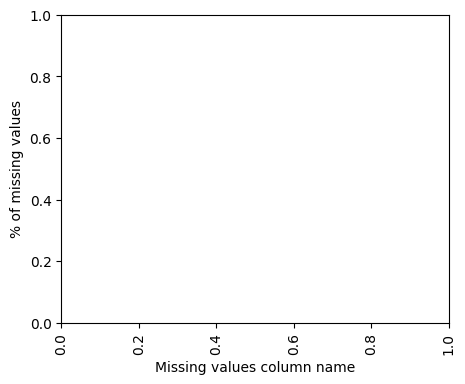

In [17]:
percent_nan = percent_missing(df_train)
show_missing(percent_nan)

#### Statistical analysis

In [18]:
df_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MSSubClass,1459.0,56.881426,42.310746,20.0,20.0,50.0,70.0,190.0
LotFrontage,1459.0,57.612748,34.673850,0.0,42.0,63.0,79.0,313.0
LotArea,1459.0,10517.363948,9984.666267,1300.0,7549.0,9477.0,11603.0,215245.0
OverallQual,1459.0,6.100069,1.383171,1.0,5.0,6.0,7.0,10.0
OverallCond,1459.0,5.575737,1.113079,1.0,5.0,5.0,6.0,9.0
YearBuilt,1459.0,1971.244003,30.199555,1872.0,1954.0,1973.0,2000.0,2010.0
YearRemodAdd,1459.0,1984.850583,20.644343,1950.0,1967.0,1994.0,2004.0,2010.0
MasVnrArea,1459.0,103.187800,180.773158,0.0,0.0,0.0,164.5,1600.0
BsmtFinSF1,1459.0,443.943797,456.106417,0.0,0.0,384.0,712.5,5644.0
BsmtFinSF2,1459.0,46.581220,161.369977,0.0,0.0,0.0,0.0,1474.0


In [19]:
df_train.describe(include='object').transpose()

,count,unique,top,freq
MSZoning,1459,5,RL,1150
Street,1459,2,Pave,1453
LotShape,1459,4,Reg,924
LandContour,1459,4,Lvl,1310
Utilities,1459,2,AllPub,1458
LotConfig,1459,5,Inside,1051
LandSlope,1459,3,Gtl,1381
Neighborhood,1459,25,NAmes,225
Condition1,1459,9,Norm,1259
Condition2,1459,8,Norm,1444


In [20]:
# Finding correlation
df_train_nums = df_train.select_dtypes(exclude='object')
df_train_objs = df_train.select_dtypes(include='object')

df_train_objs = pd.get_dummies(df_train_objs, drop_first=True)

df_train = pd.concat([df_train_nums,df_train_objs], axis=1)

correlation = df_train.corr()['SalePrice'].sort_values()
correlation[(correlation>0.25) | (correlation < -0.25)]

ExterQual_TA            -0.589082
KitchenQual_TA          -0.519600
FireplaceQu_None        -0.471971
BsmtQual_TA             -0.452626
GarageFinish_Unf        -0.410809
MasVnrType_None         -0.367450
GarageType_Detchd       -0.354258
Foundation_CBlock       -0.343458
HeatingQC_TA            -0.312799
MSZoning_RM             -0.288134
LotShape_Reg            -0.267639
BsmtExposure_No         -0.263567
CentralAir_Y             0.251367
GarageYrBlt              0.261413
LotArea                  0.263837
GarageCond_TA            0.275921
HalfBath                 0.284400
Exterior1st_VinylSd      0.305361
Exterior2nd_VinylSd      0.306751
BsmtExposure_Gd          0.307275
OpenPorchSF              0.315831
2ndFlrSF                 0.319464
KitchenQual_Gd           0.321950
WoodDeckSF               0.324422
Neighborhood_NoRidge     0.330410
MasVnrType_Stone         0.330454
GarageType_Attchd        0.335993
FireplaceQu_Gd           0.339304
SaleCondition_Partial    0.352039
SaleType_New  

##### Conclusions
From the above results, it can be seen that there are high correlations between sale price and:
- OverallQual: overall quality
- GrLivArea: above grade (ground) living area square feet
- GarageCars: size of garage in car capacity
- GarageArea: Size of garage in square feet
- TotalBsmtSF: Total square feet of basement area
- 1stFlrSF: First Floor square feet

More values may be considered when further adjusting the final model.

### Visualisation

#### Distributon of house prices

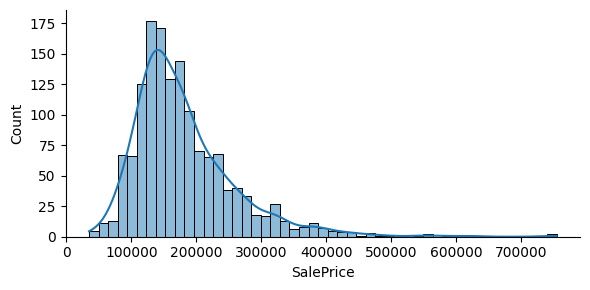

In [21]:
sns.displot(data=df_train, x='SalePrice', kde=True, height=3, aspect=2)

#### Outliers

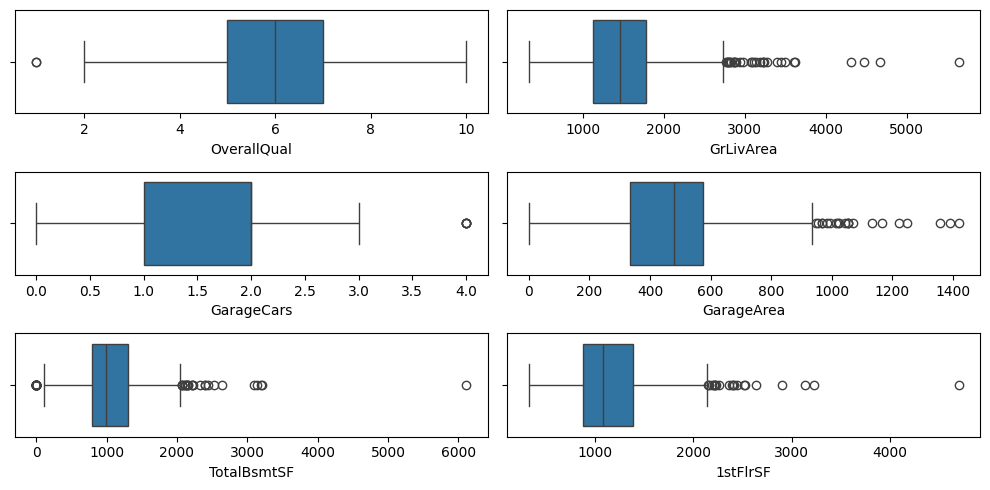

In [22]:
fig, axes = plt.subplots(3,2)
fig.set_size_inches(10,5)
sns.boxplot(data=df_train, x='OverallQual', ax=axes[0][0])
sns.boxplot(data=df_train, x='GrLivArea', ax=axes[0][1])
sns.boxplot(data=df_train, x='GarageCars', ax=axes[1][0])
sns.boxplot(data=df_train, x='GarageArea', ax=axes[1][1])
sns.boxplot(data=df_train, x='TotalBsmtSF', ax=axes[2][0])
sns.boxplot(data=df_train, x='1stFlrSF', ax=axes[2][1])
plt.tight_layout()

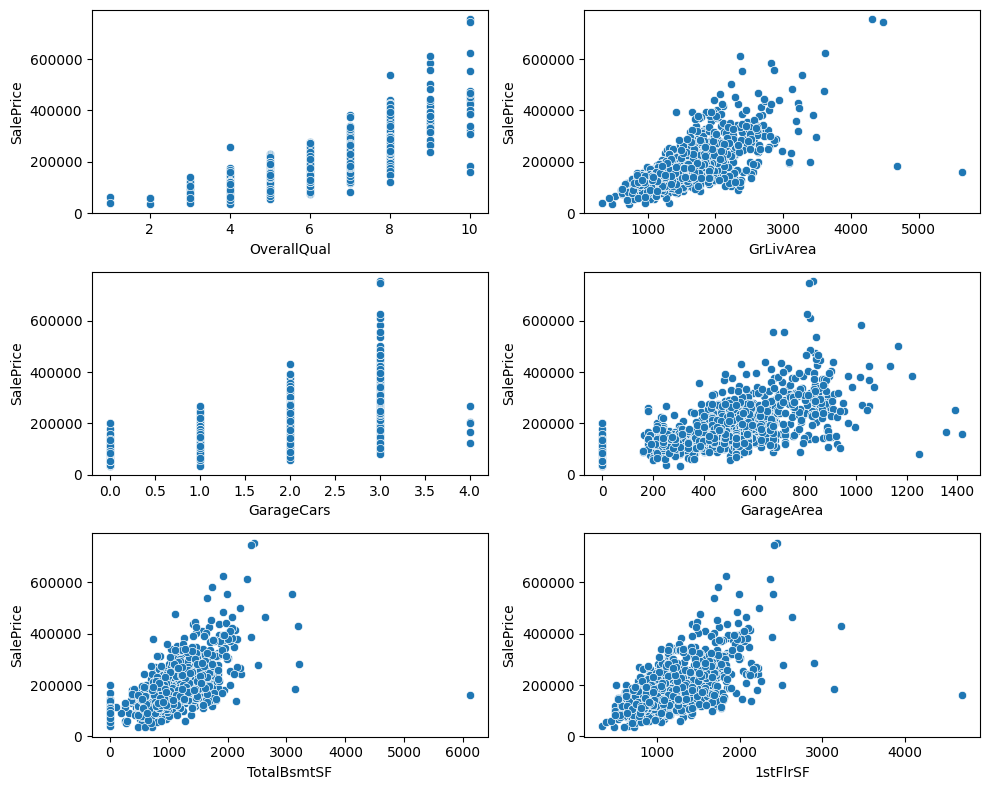

In [23]:
fig, axes = plt.subplots(3,2)
fig.set_size_inches(10,8)
sns.scatterplot(data=df_train, x='OverallQual', y='SalePrice', ax=axes[0][0])
sns.scatterplot(data=df_train, x='GrLivArea', y='SalePrice', ax=axes[0][1])
sns.scatterplot(data=df_train, x='GarageCars', y='SalePrice', ax=axes[1][0])
sns.scatterplot(data=df_train, x='GarageArea', y='SalePrice', ax=axes[1][1])
sns.scatterplot(data=df_train, x='TotalBsmtSF', y='SalePrice', ax=axes[2][0])
sns.scatterplot(data=df_train, x='1stFlrSF', y='SalePrice', ax=axes[2][1])
plt.tight_layout()

##### Dealing with outliers

In [24]:
import scipy.stats as stats

In [25]:
outliers_columns = ['OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF','1stFlrSF']

In [31]:
zscores = stats.zscore(df_train[outliers_columns])
outliers_condition = (zscores>3) | (zscores <-3)

df_train[outliers_condition.any(axis=1)]

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
58,60,66.0,13682,10,5,2006,2006,1031.0,0,0,...,False,False,True,False,False,False,False,False,False,True
66,20,0.0,19900,7,5,1970,1989,287.0,912,0,...,False,False,False,False,True,False,False,False,True,False
70,20,95.0,13651,7,6,1973,1973,1115.0,1880,0,...,False,False,False,False,True,False,False,False,True,False
113,20,0.0,21000,6,5,1953,1953,184.0,35,869,...,False,False,False,False,False,False,False,False,False,False
324,80,96.0,11275,7,7,1967,2007,300.0,0,0,...,False,False,False,False,True,False,False,False,True,False
420,90,78.0,7060,7,5,1997,1998,200.0,1309,0,...,False,False,False,False,True,False,True,False,False,False
636,30,51.0,6120,2,3,1936,1950,0.0,0,0,...,False,True,False,False,False,False,False,False,True,False
747,70,65.0,11700,7,7,1880,2003,0.0,0,0,...,False,False,False,False,True,False,False,False,True,False
888,20,95.0,15865,8,6,1970,1970,0.0,351,823,...,False,False,False,False,True,False,False,False,True,False
916,20,50.0,9000,2,3,1949,1950,0.0,50,0,...,False,False,False,False,True,False,False,False,False,False


In [28]:
df_train = df_train[~outliers_condition.any(axis=1)]

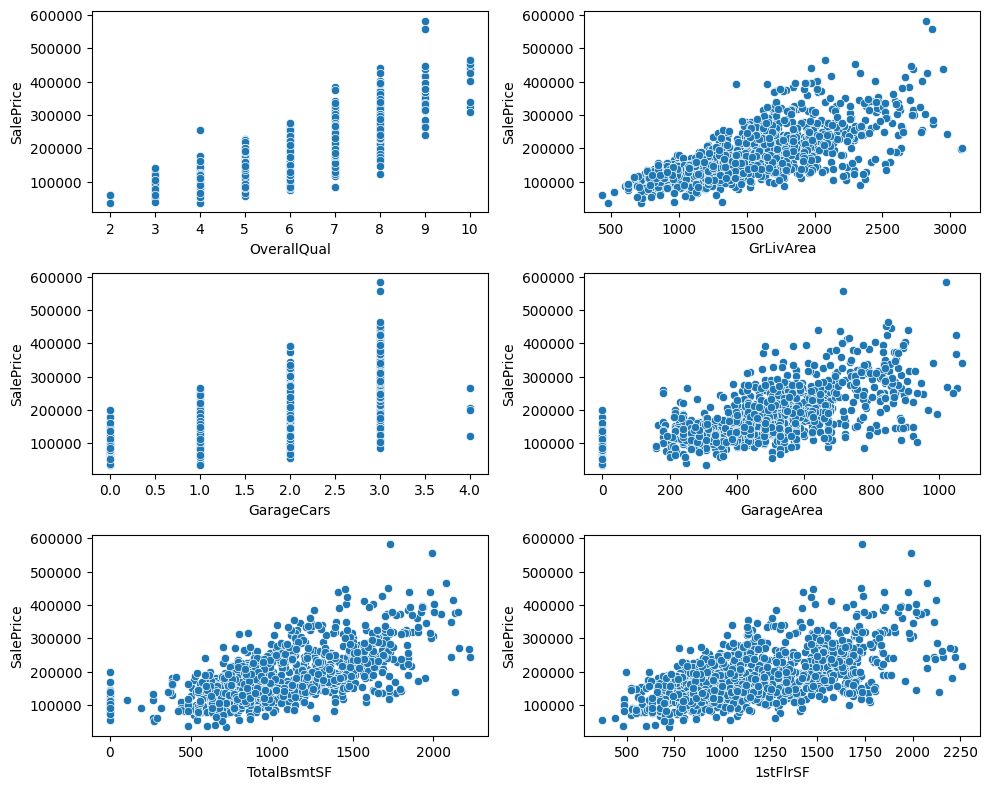

In [29]:
fig, axes = plt.subplots(3,2)
fig.set_size_inches(10,8)
sns.scatterplot(data=df_train, x='OverallQual', y='SalePrice', ax=axes[0][0])
sns.scatterplot(data=df_train, x='GrLivArea', y='SalePrice', ax=axes[0][1])
sns.scatterplot(data=df_train, x='GarageCars', y='SalePrice', ax=axes[1][0])
sns.scatterplot(data=df_train, x='GarageArea', y='SalePrice', ax=axes[1][1])
sns.scatterplot(data=df_train, x='TotalBsmtSF', y='SalePrice', ax=axes[2][0])
sns.scatterplot(data=df_train, x='1stFlrSF', y='SalePrice', ax=axes[2][1])
plt.tight_layout()

## Modeling

### Data preparation

In [ ]:
evaluation_dict = {}

### Train | Test Split

## Model1

### Evaluation

#### Overfitting check

#### Residuals

## Model2

### Data Scaling

### Model

### Evaluation

#### Overfitting check

#### Residuals

## Model3

### Model

### Evaluation

#### Overfitting check

#### Residuals

## Model4

### Model

### Evaluation

#### Overfitting check

#### Residuals

## Models comparison

#### Conclusions

## Final Model